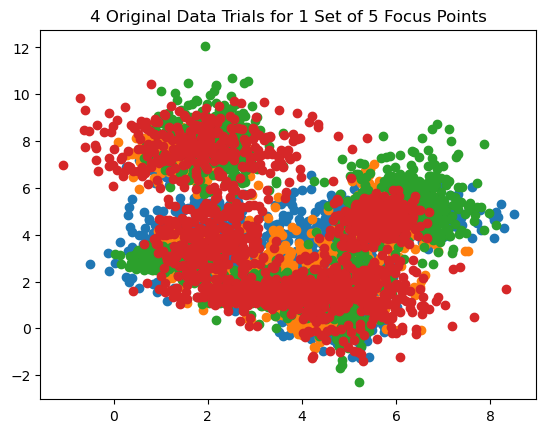

In [2]:
import numpy as np
import matplotlib.pyplot as plt

trueDistSets = np.load('data\\trueDistSets.npy')
offDistSets = np.load('data\\offDistSets.npy')

for i in range(4):
    plt.plot(trueDistSets[0, :, i+1, 0], trueDistSets[1, :, i+1, 0], 'o')
plt.title('4 Original Data Trials for 1 Set of 5 Focus Points')
plt.savefig('pics\\orig_trials.png')
plt.show()

3.5178472397175207
3.753314843543261
[[3.69815089 3.47661374 3.64200098 3.59461016 3.70385453 3.44604622
  3.46671496 3.55433499 3.45417    3.55989058 3.55094178 3.48514551
  3.55095691 3.34477527 3.59027957 3.59316387 3.54131031 3.48147633
  3.45800195 3.44183476 3.395732   3.49596743 3.490291   3.32772088
  3.41485968 3.62156201 3.42202918 3.59751747 3.43836013 3.59766232
  3.56033625 3.54227664 3.54035829 3.48549048 3.64346297 3.4542468
  3.62416267 3.53588496 3.6251302  3.35250781 3.43810482 3.53738954
  3.80617854 3.4551198  3.25254892 3.64786653 3.39715912 3.52246772]
 [3.91347841 3.7438717  3.858958   3.8078327  3.92189705 3.67736576
  3.63508038 3.81475517 3.7477314  3.88739696 3.7825705  3.69935916
  3.8010261  3.56788068 3.82035494 3.8474646  3.75095072 3.72316283
  3.73626853 3.68447337 3.59748776 3.71681369 3.69751619 3.56652503
  3.68353787 3.85044388 3.67132167 3.79914164 3.72329417 3.84543034
  3.78484185 3.75738235 3.72980317 3.72505657 3.92980709 3.65406153
  3.8976300

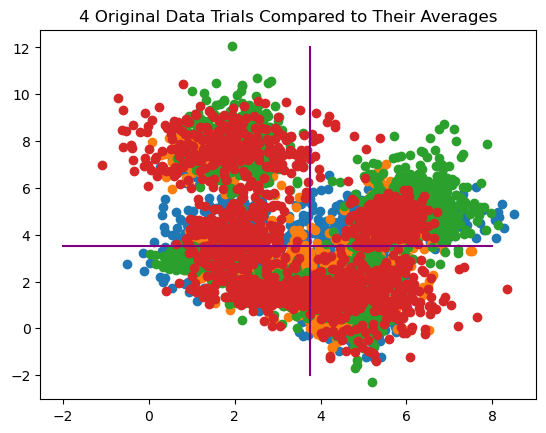

In [3]:
import statistics as stat

offSample = offDistSets[:, :, 0, 0]
goodSamples = trueDistSets[:, :, 1:, 0]
trials = len(goodSamples[0, 0, :])

avgs = np.zeros(shape=(2, trials-1))

for i in range(trials-1):
    avgs[0, i] = stat.mean(goodSamples[0, :, i])
    avgs[1, i] = stat.mean(goodSamples[1, :, i])

xavg = stat.fmean(avgs[0, :])
yavg = stat.fmean(avgs[1, :])

print(xavg)
print(yavg)
print(avgs)
print(avgs[:, :] @ np.full(len(avgs[0, :]), 1)/len(avgs[0, :]))

for i in range(4):
    plt.plot(goodSamples[0, :, i], goodSamples[1, :, i], 'o')
plt.plot([-2, 8], [xavg, xavg], color='purple')
plt.plot([yavg, yavg], [-2, 12], color='purple')
plt.title('4 Original Data Trials Compared to Their Averages')
plt.show()


3.3607690741687506
4.6208050800506095


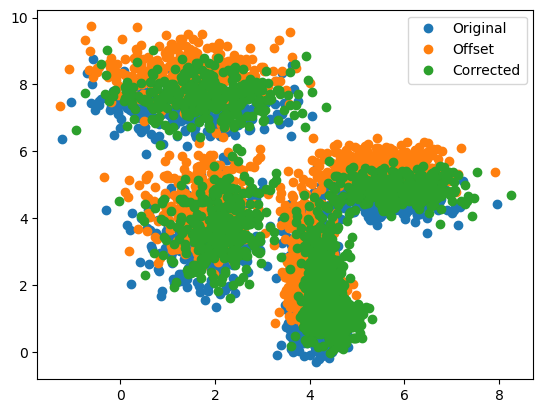

In [80]:
offXAvg = stat.fmean(offSample[0, :])
offYAvg = stat.fmean(offSample[1, :])

print(offXAvg); print(offYAvg)

dispX = xavg - offXAvg; dispY = yavg - offYAvg

dispSample = offSample + ((np.full(len(offSample[0, :]), dispX)[None].T @ np.array([1, 0])[None]).T + 
                          (np.full(len(offSample[0, :]), dispY)[None].T @ np.array([0, 1])[None]).T)


plt.plot(trueDistSets[0, :, 0, 0], trueDistSets[1, :, 0, 0], 'o')
plt.plot(offSample[0, :], offSample[1, :], 'o')
plt.plot(dispSample[0, :], dispSample[1, :], 'o')
plt.legend(['Original', 'Offset', 'Corrected'])
plt.show()

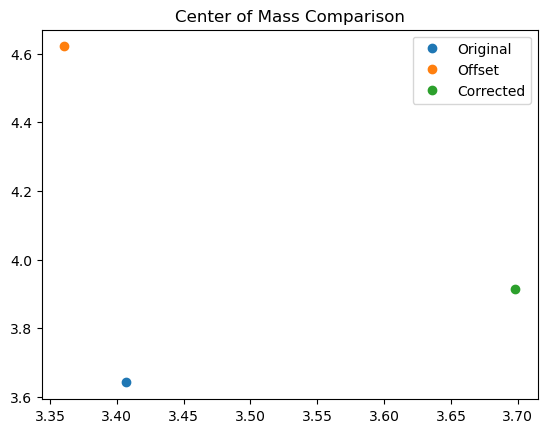

Distance from Offset to True: 0.9598252847326645
Distance from Corrected to True: 0.1585538049002903


In [86]:
trueXAvg = stat.mean(trueDistSets[0, :, 0, 0])
trueYAvg = stat.mean(trueDistSets[1, :, 0, 0])

plt.plot(trueXAvg, trueYAvg, 'o')
plt.plot(offXAvg, offYAvg, 'o')
plt.plot(dispX+offXAvg, dispY+offYAvg, 'o')
plt.title('Center of Mass Comparison')
plt.legend(['Original', 'Offset', 'Corrected'])
plt.show()

print('Distance from Offset to True: ' + str((trueXAvg-offXAvg)**2+(trueYAvg-offYAvg)**2))
print('Distance from Corrected to True: ' + str((trueXAvg-(dispX+offXAvg))**2+(trueYAvg-(dispY+offYAvg))**2))